# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array
from tensorflow.keras.preprocessing import image


In [2]:
dataset= r"D:\Deep Learning\Projects\Anti Action Detection"
closed_eyes =r"D:\Deep Learning\Projects\Anti Action Detection\eyes\close"
opened_eyes=r"D:\Deep Learning\Projects\Anti Action Detection\eyes\open"


In [3]:
vals = [closed_eyes,opened_eyes]
print("the no of closed eyes images are:", os.listdir(vals[0]).__len__())
print("the no of opened eyes images are:", os.listdir(vals[1]).__len__())


the no of closed eyes images are: 731
the no of opened eyes images are: 1436


# Creating the dataframe for our model

In [4]:
#here we have created a path directory and class directory for our datasets. 
#Then we have created two empty list i.e. filepath and lables. 
#then we run a for loop i,j on pathdir and classes together.
#then we run another for loop for filelist in which we join the path and the name of the image.
#then we join the filepath with the images and labels with the classes
from PIL import Image
pathdir = [closed_eyes,opened_eyes]
classes =['closed_eyes','opened_eyes']
filepath= []
labels=[]
img_size=[]
for i, j in zip(pathdir,classes):
    filelist= os.listdir(i)
    print(filelist)
    for vals in filelist:
        x= os.path.join(i, vals)
        img= Image.open(x)
        img_size.append(img)
        filepath.append(x)
        labels.append(j)
(filepath.__len__(), labels.__len__(), )

['s0001_00001_0_0_0_0_0_01.png', 's0001_00002_0_0_0_0_0_01.png', 's0001_00003_0_0_0_0_0_01.png', 's0001_00004_0_0_0_0_0_01.png', 's0001_00005_0_0_0_0_0_01.png', 's0001_00006_0_0_0_0_0_01.png', 's0001_00007_0_0_0_0_0_01.png', 's0001_00008_0_0_0_0_0_01.png', 's0001_00009_0_0_0_0_0_01.png', 's0001_00010_0_0_0_0_0_01.png', 's0001_00011_0_0_0_0_0_01.png', 's0001_00012_0_0_0_0_0_01.png', 's0001_00013_0_0_0_0_0_01.png', 's0001_00014_0_0_0_0_0_01.png', 's0001_00015_0_0_0_0_0_01.png', 's0001_00016_0_0_0_0_0_01.png', 's0001_00017_0_0_0_0_0_01.png', 's0001_00018_0_0_0_0_0_01.png', 's0001_00019_0_0_0_0_0_01.png', 's0001_00020_0_0_0_0_0_01.png', 's0001_00021_0_0_0_0_0_01.png', 's0001_00022_0_0_0_0_0_01.png', 's0001_00023_0_0_0_0_0_01.png', 's0001_00024_0_0_0_0_0_01.png', 's0001_00025_0_0_0_0_0_01.png', 's0001_00026_0_0_0_0_0_01.png', 's0001_00027_0_0_0_0_0_01.png', 's0001_00028_0_0_0_0_0_01.png', 's0001_00029_0_0_0_0_0_01.png', 's0001_00030_0_0_0_0_0_01.png', 's0001_00031_0_0_0_0_0_01.png', 's0001_

['s0001_00046_0_0_0_0_0_01.png', 's0001_00921_0_0_0_0_0_01.png', 's0001_00922_0_1_0_2_0_01.png', 's0001_00923_0_1_0_2_0_01.png', 's0001_00924_0_1_0_2_0_01.png', 's0001_00925_0_1_0_1_1_01.png', 's0001_00926_0_1_0_0_1_01.png', 's0001_00927_0_1_0_2_0_01.png', 's0001_00928_0_1_0_2_0_01.png', 's0001_01805_0_1_0_0_0_01.png', 's0001_01806_0_1_0_0_1_01.png', 's0001_01807_0_1_0_0_0_01.png', 's0001_01808_0_1_0_0_1_01.png', 's0001_01809_0_1_0_2_0_01.png', 's0001_01810_0_1_0_0_0_01.png', 's0001_01811_0_1_0_0_1_01.png', 's0001_01812_0_1_0_0_0_01.png', 's0001_01813_0_1_0_0_1_01.png', 's0001_01814_0_1_0_2_0_01.png', 's0001_01815_0_1_0_0_0_01.png', 's0001_01816_0_1_0_0_1_01.png', 's0001_01817_0_1_0_0_0_01.png', 's0001_01818_0_1_0_0_1_01.png', 's0001_01819_0_1_0_0_0_01.png', 's0001_01820_0_1_0_2_0_01.png', 's0001_01821_0_1_0_0_1_01.png', 's0001_01822_0_1_0_0_0_01.png', 's0001_01823_0_1_0_0_1_01.png', 's0001_01824_0_1_0_0_0_01.png', 's0001_01825_0_1_0_0_1_01.png', 's0001_01826_0_1_0_0_0_01.png', 's0001_

(2167, 2167)

In [5]:
filepath

['D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00001_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00002_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00003_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00004_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00005_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00006_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00007_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00008_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00009_0_0_0_0_0_01.png',
 'D:\\Deep Learning\\Projects\\Anti Action Detection\\eyes\\close\\s0001_00010_0_0_0_0_0_01.png',
 'D:\\Deep Learning\

In [6]:
img_size

[<PIL.PngImagePlugin.PngImageFile image mode=L size=86x86>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=84x84>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=81x81>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=78x78>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=81x81>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=81x81>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=82x82>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=82x82>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=90x90>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=106x106>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=83x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=80x80>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=89x89>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=84x84>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=84x84>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=87x87>,
 <PIL.PngImagePlugin.PngImageFile imag

In [7]:
labels

['closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed_eyes',
 'closed

In [8]:
#here we have merged the filepath and labels using the zip function and then created a dataframe df
dataset= list(zip(filepath, labels))
df=pd.DataFrame(dataset, columns=['Filepath', 'Labels'])


In [9]:
df.head(10)

,Filepath,Labels
0,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
1,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
2,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
3,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
4,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
5,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
6,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
7,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
8,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes
9,D:\Deep Learning\Projects\Anti Action Detectio...,closed_eyes


<function matplotlib.pyplot.show(close=None, block=None)>

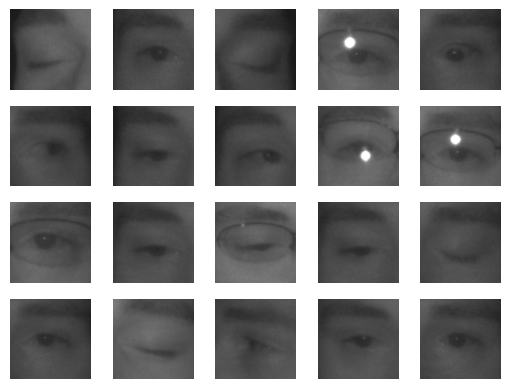

In [10]:
#basically here we are plotting 20 random images selecting from the filepath of the df dataframe 
for i in range(0,20):
    vals= np.random.randint(1, len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.Filepath[vals]))
    plt.axis('off') #axis off means it will not show xticks and yticks
plt.show


In [11]:
#Dividing the dataset for training our model
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df, test_size=0.1, random_state=0)
Train_new, valid = train_test_split(Train, test_size=0.1112, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(1950, 2) (217, 2) (1733, 2) (217, 2)


In [12]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=45, width_shift_range=0, height_shift_range=0.1, shear_range=0.1,
zoom_range=0.1, horizontal_flip=True, vertical_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255)

#here we use the image data generator package to hypertune our training data by doing image preprocessing like rescaling & normalizing, etc..
#We do the same in both test, train and valid too.


In [13]:
#here we apply the above preprocessing into our real time dataset.
train_gen =train_datagen.flow_from_dataframe(dataframe=Train_new, x_col= 'Filepath', y_col='Labels', batch_size=8, target_size=(150,150),
                                           class_mode='categorical',classes=['closed_eyes', 'opened_eyes'], shuffle=True)
valid_gen =train_datagen.flow_from_dataframe(dataframe=valid, x_col= 'Filepath', y_col='Labels', batch_size=8, target_size=(150,150),
                                           class_mode='categorical', shuffle=True)
test_gen= test_datagen.flow_from_dataframe(dataframe=Test, x_col='Filepath', y_col='Labels', batch_size=8, 
                                          target_size=(150,150), class_mode='categorical',classes=['closed_eyes', 'opened_eyes'], shuffle=False)
print('Classes: '+str(classes))
print(len(classes))

Found 1733 validated image filenames belonging to 2 classes.
Found 217 validated image filenames belonging to 2 classes.
Found 217 validated image filenames belonging to 2 classes.
Classes: ['closed_eyes', 'opened_eyes']
2


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array
print(train_gen.class_indices)
print(train_gen[0][0].shape)
print(valid_gen[0][0].shape)
print(test_gen[0][0].shape)

{'closed_eyes': 0, 'opened_eyes': 1}
(8, 150, 150, 3)
(8, 150, 150, 3)
(8, 150, 150, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

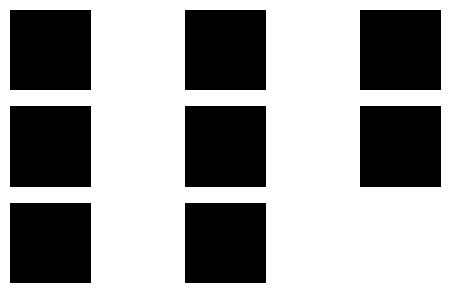

In [15]:
for i in range(0,8):
    val= train_gen[0][0][i]
    vals=val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show

# Data Augmentation

In [16]:
from tensorflow.keras import models,layers
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [17]:
# #here we train the model using google's inception V2 pretrained models (it has 7 convolution layers)
# #because this function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet
# #we use sigmoid as the activation function for the output layer and relu for the hidden layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D

# base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape=(150,150,3), include_top=False)
# model= Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(6, activation= 'softmax'))

# Building the CNN Model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.callbacks import EarlyStopping

# # Set up early stopping to prevent overfitting
#early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# # Train the model
# #batch size se pta chalta hai konsa gradient descent use kiya hai 
# #if batch size =no.of rows then stochastic , bydefault batch hota hai
# history = model.fit(train_gen, epochs=20, validation_data=valid_gen, callbacks=early_stopping)
# #loss dekh k mujhe ye to pta chal  rha hai ki vanishing gradient problem nahi hai


model = Sequential()
data_augmentation
model.add(Conv2D(75, (3,3), 1, activation='relu', input_shape=(150,150,3)))
model.add(Dropout(0.6))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())





model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

hist = model.fit(train_gen, epochs=10, validation_data=valid_gen, callbacks=[tensorboard_callback])



Epoch 1/10


217/217 [==============================] - 52s 227ms/step - loss: 0.5446 - accuracy: 0.7190 - val_loss: 0.4558 - val_accuracy: 0.8387
Epoch 2/10
217/217 [==============================] - 46s 214ms/step - loss: 0.3212 - accuracy: 0.8909 - val_loss: 0.3304 - val_accuracy: 0.9217
Epoch 3/10
217/217 [==============================] - 49s 224ms/step - loss: 0.2720 - accuracy: 0.9100 - val_loss: 0.2975 - val_accuracy: 0.9401
Epoch 4/10
217/217 [==============================] - 47s 217ms/step - loss: 0.2274 - accuracy: 0.9152 - val_loss: 0.2800 - val_accuracy: 0.9447
Epoch 5/10
217/217 [==============================] - 48s 219ms/step - loss: 0.1924 - accuracy: 0.9256 - val_loss: 0.2484 - val_accuracy: 0.9585
Epoch 6/10
217/217 [==============================] - 47s 217ms/step - loss: 0.1447 - accuracy: 0.9504 - val_loss: 0.2474 - val_accuracy: 0.9493
Epoch 7/10
217/217 [==============================] - 47s 216ms/step - loss: 0.1295 - accuracy: 0.9573 - val_loss: 0.2275 - va

# Finding Hyperparameters Using Random Search

In [19]:
# Function to create a model
def build_model(hp):
    
    model = Sequential() 
    
    count = 0
    # For number of layers
    for i in range(hp.Int('layers',min_value=1,max_value=10)):
        if count == 0:
            model.add( # Means input layer
                Dense(hp.Int('neurons'+str(i),min_value=8,max_value=128)
                ,activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),input_dim = 9)
            )
            model.add(Dropout(hp.Choice('droput'+str(i),values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add( 
                Dense(hp.Int('neurons'+str(i),min_value=8,max_value=128)
                ,activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']))
            )
            model.add(Dropout(hp.Choice('droput'+str(i),values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        count = count+1
        
        
    # Output layer
    model.add(Dense(1,activation='sigmoid'))
        
    # Compiling the model
    model.compile(optimizer = hp.Choice('optimiers',values = ['adam','sgd','rmsprop','adadelta']), loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# Creating an tuner object of RandomSearch class
import keras_tuner as kt
from keras.models import Sequential
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [21]:
# Let's now search best hyper parameters
tuner.search(valid,epochs=5,validation_data=(valid))

INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.get_best_hyperparameters()[0].values

{'layers': 8,
 'neurons0': 9,
 'activation0': 'relu',
 'droput0': 0.1,
 'optimiers': 'rmsprop',
 'neurons1': 40,
 'activation1': 'relu',
 'droput1': 0.7,
 'neurons2': 35,
 'activation2': 'relu',
 'droput2': 0.9,
 'neurons3': 113,
 'activation3': 'sigmoid',
 'droput3': 0.5,
 'neurons4': 8,
 'activation4': 'relu',
 'droput4': 0.7,
 'neurons5': 113,
 'activation5': 'relu',
 'droput5': 0.8,
 'neurons6': 93,
 'activation6': 'relu',
 'droput6': 0.4,
 'neurons7': 49,
 'activation7': 'relu',
 'droput7': 0.1,
 'neurons8': 86,
 'activation8': 'sigmoid',
 'droput8': 0.3,
 'neurons9': 95,
 'activation9': 'tanh',
 'droput9': 0.9}

# Plotting the curve between Accuracy and validation Accuracy

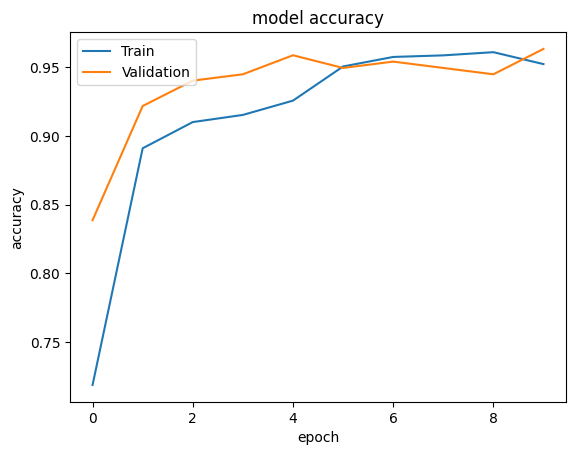

In [23]:
#for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluating the performance of our model

In [24]:
# Evaluate the model on the test set.
test_loss, test_acc = model.evaluate(test_gen)
print('Test accuracy:', test_acc)

28/28 [==============================] - 1s 34ms/step - loss: 0.2025 - accuracy: 0.9770
Test accuracy: 0.9769585132598877


In [25]:
# Saving the model
model.save('inceptionv3.h5')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 208ms/step
The image is of opened_eyes


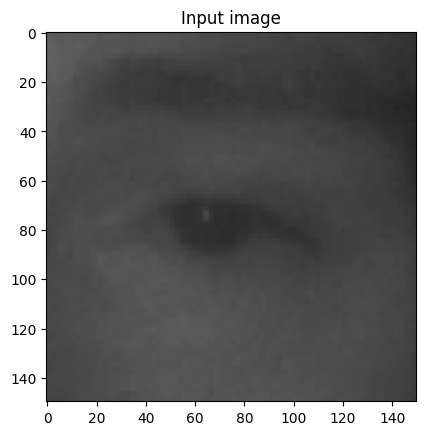

In [26]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


path = r"D:\Deep Learning\Projects\Anti Action Detection\eyes\open\s0001_01846_0_0_1_0_0_01.png" 
img = load_img(path, target_size=(150, 150))

i = img_to_array(img) / 255.0
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"The image is of {classes[pred]}")

# To display the image
plt.imshow(img)
plt.title("Input image")
plt.show()
